**Final Project - Banking Marketing Targets**

Stage 3 : Modeling

Team : **Group 13 (Data Legion)**

Mentor : Kevin

Team Member :
- *Sayyid Abdurrabbi*
- *Muthmainah*
- *Aryan Noor*
- *Dicky Pratama*
- *Wafi Hanan*
- *Maisya Sabrina*
- *Nadila Nurul Jelita*
- *Erfan Muhammad Rahmawan*

About Dataset

The The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv(r'Banking Marketing Targets.csv')
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
8384,38,management,married,tertiary,yes,-562,yes,no,unknown,3,jun,206,1,-1,0,unknown,no
27763,55,technician,divorced,secondary,yes,4,no,no,cellular,28,jan,1048,1,-1,0,unknown,yes
15494,26,services,married,secondary,no,0,no,no,cellular,18,jul,409,2,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


Nama kolom dan tipe data sudah sesuai, 

**A. Handling Missing Value / Unknown Value**

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak terdapat nilai kosong (NaN) pada dataset ini.

In [7]:
cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
nums = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom job:
blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64

Value count kolom marital:
married     30011
single      13986
divorced     5735
Name: marital, dtype: int64

Value count kolom education:
secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64

Value count kolom default:
no     48841
yes      891
Name: default, dtype: int64

Value count kolom housing:
yes    27689
no     22043
Name: housing, dtype: int64

Value count kolom loan:
no     41797
yes     7935
Name: loan, dtype: int64

Value count kolom contact:
cellular     32181
unknown      14344
telephone     3207
Name: contact, dtype: int64

Value count kolom month:
may    15164
jul     7601
aug     6880
jun     5872


Terdapat *unknown value* pada fitur job, education dan contact.


In [8]:
unknown_values = ["unknown"]
data_checkna = pd.read_csv(r'C:\Users\Z40\Documents\Rakamin Academy - Data Science\Banking Marketing Targets.csv')

In [9]:
print(data_checkna.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Solusi untuk *unknown value* pada fiture job, education, & contact adalah dengan mengganti *unknown value* menjadi nilai terbanyak (modus). Pertimbangan ingin dikarenakan *unknown value* pada fitur cukup banyak terutama pada fitur contact yaitu 28.80% dari total kolom.

*Sedangkan ***unknown value*** pada pada fitur poutcome merupakan nilai dari poutcome itu sendiri dimana sebelumnya belum pernah melakukan kampanye telepon.* 

In [10]:
df["job"].replace(["unknown"],df["job"].mode(),inplace = True)
df["education"].replace(["unknown"],df["education"].mode(),inplace = True)
df["contact"].replace(["unknown"],df["contact"].mode(),inplace = True)

In [11]:
df['job'].value_counts()

blue-collar      11004
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
Name: job, dtype: int64

In [12]:
df['education'].value_counts()

secondary    27552
tertiary     14651
primary       7529
Name: education, dtype: int64

In [13]:
df['contact'].value_counts()

cellular     46525
telephone     3207
Name: contact, dtype: int64

**B. Handle Duplicated Data**

In [14]:
print(df.duplicated().value_counts())
print(df.duplicated().sum())

False    45211
True      4521
dtype: int64
4521


Tidak terdapat duplikasi data.

**C. Handle Outliers**

In [15]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

for col in ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']:
    zscore = abs(stats.zscore(df[col]))
    filtered = (zscore < 3)
df_filtered = df[filtered]

print(f'Jumlah baris setelah memfilter outlier: {len(df_filtered)}')

Jumlah baris sebelum memfilter outlier: 49732
Jumlah baris setelah memfilter outlier: 49098


**E. Log Transformation**

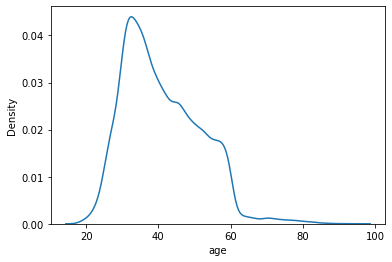

In [16]:
sns.kdeplot(df_filtered['age'])
plt.show()

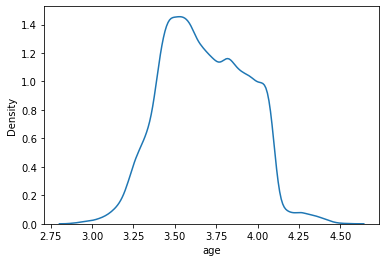

In [17]:
#Log Transformation

sns.kdeplot(np.log(df_filtered['age']))
plt.show()

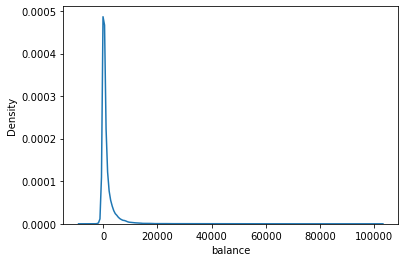

In [18]:
sns.kdeplot(df_filtered['balance'])
plt.show()

C:\Users\Z40\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Z40\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


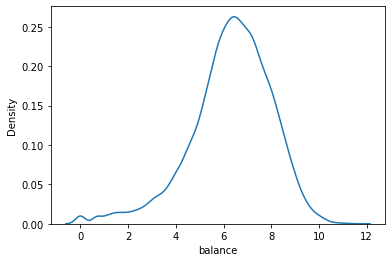

In [19]:
#Log Transformation

sns.kdeplot(np.log(df_filtered['balance']))
plt.show()

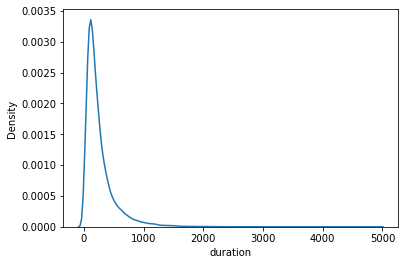

In [20]:
sns.kdeplot(df_filtered['duration'])
plt.show()

C:\Users\Z40\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


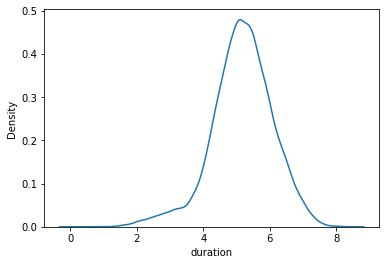

In [21]:
sns.kdeplot(np.log(df_filtered['duration']))
plt.show()

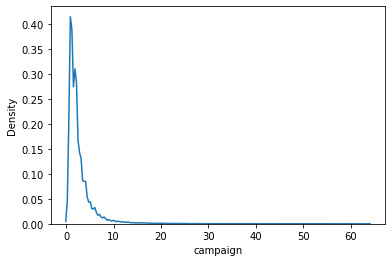

In [22]:
sns.kdeplot(df_filtered['campaign'])
plt.show()

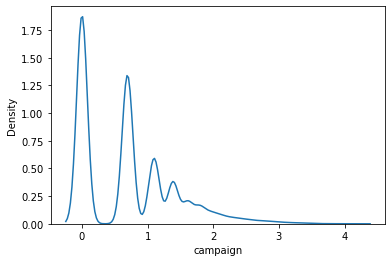

In [23]:
sns.kdeplot(np.log(df_filtered['campaign']))
plt.show()

Setelah diakukan log transformation, grafik distribusi fitur ... menjadi mendekati distribusi normal.

### Feature Transformation

In [24]:
# Standarisasi
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_filtered['age'] = StandardScaler().fit_transform(df_filtered['age'].values.reshape(len(df_filtered), 1))
df_filtered['balance'] = StandardScaler().fit_transform(df_filtered['balance'].values.reshape(len(df_filtered), 1))
df_filtered['duration'] = StandardScaler().fit_transform(df_filtered['duration'].values.reshape(len(df_filtered), 1))
df_filtered['campaign'] = StandardScaler().fit_transform(df_filtered['campaign'].values.reshape(len(df_filtered), 1))

C:\Users\Z40\AppData\Local\Temp\ipykernel_1464\593248141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age'] = StandardScaler().fit_transform(df_filtered['age'].values.reshape(len(df_filtered), 1))
C:\Users\Z40\AppData\Local\Temp\ipykernel_1464\593248141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['balance'] = StandardScaler().fit_transform(df_filtered['balance'].values.reshape(len(df_filtered), 1))
C:\Users\Z40\AppData\Local\Temp\ipykernel_1464\593248141.py:6: Setting

In [25]:
df_filtered[['age', 'balance', 'duration','campaign']].describe()

,age,balance,duration,campaign
count,4.909800e+04,4.909800e+04,4.909800e+04,4.909800e+04
mean,-1.158285e-15,4.788495e-16,-9.426313e-17,2.427028e-15
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-2.165520e+00,-3.080397e+00,-1.003102e+00,-5.681204e-01
25%,-7.505442e-01,-4.248596e-01,-6.038384e-01,-5.681204e-01
50%,-1.845538e-01,-3.020943e-01,-3.053600e-01,-2.465362e-01
75%,6.644318e-01,1.950804e-02,2.373278e-01,7.504812e-02
max,5.098023e+00,3.307496e+01,1.806075e+01,1.937011e+01


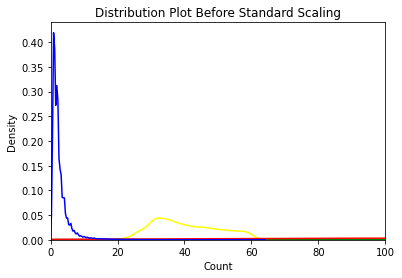

In [26]:
fig, ax = plt.subplots()
sns.kdeplot(df['age'], ax=ax, color ='yellow')
sns.kdeplot(df['balance'], ax=ax, color ='green')
sns.kdeplot(df['duration'], ax=ax, color ='red')
sns.kdeplot(df['campaign'], ax=ax, color ='blue')
ax.set_xlim(0,100)
ax.set_title('Distribution Plot Before Standard Scaling')
plt.xlabel('Count')
plt.show()

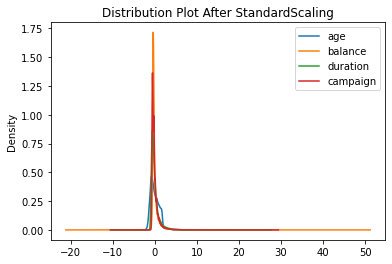

In [27]:
df_1 = df_filtered[['age', 'balance', 'duration', 'campaign']]
ax = df_1.plot.kde()
ax.set_title('Distribution Plot After StandardScaling')
plt.show()

**F. Feature Encoding**

**Label Encoding**

In [28]:
df_filtered['marital'] = df_filtered['marital'].astype('category').cat.codes
df_filtered['education'] = df_filtered['education'].astype('category').cat.codes
df_filtered['default'] = df_filtered['default'].astype('category').cat.codes
df_filtered['housing'] = df_filtered['housing'].astype('category').cat.codes
df_filtered['loan'] = df_filtered['loan'].astype('category').cat.codes
df_filtered['contact'] = df_filtered['contact'].astype('category').cat.codes
df_filtered['poutcome'] = df_filtered['poutcome'].astype('category').cat.codes
df_filtered['y'] = df_filtered['y'].astype('category').cat.codes

C:\Users\Z40\AppData\Local\Temp\ipykernel_1464\2583081025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['marital'] = df_filtered['marital'].astype('category').cat.codes
C:\Users\Z40\AppData\Local\Temp\ipykernel_1464\2583081025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['education'] = df_filtered['education'].astype('category').cat.codes
C:\Users\Z40\AppData\Local\Temp\ipykernel_1464\2583081025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [108]:
df_filtered.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.607749,management,1,2,0,0.255273,1,0,0,5,may,0.008624,-0.56812,-1,0,3,0
1,0.287105,technician,2,1,0,-0.438646,1,0,0,5,may,-0.417774,-0.56812,-1,0,3,0
2,-0.750544,entrepreneur,1,1,0,-0.447509,1,1,0,5,may,-0.708500,-0.56812,-1,0,3,0


Value yang sebelumnya berjenis kategorik pada fitur ..., telah ter-encode menjadi numerik.

**One-hot Encoding**

In [261]:
df_job = pd.get_dummies(df_filtered['job'], prefix='job')
df = df_filtered.join(df_job)

df = df.drop(columns=['job'])
df.head(3)

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,1.607749,1,2,0,0.255273,1,0,0,5,may,...,0,0,0,1,0,0,0,0,0,0
1,0.287105,2,1,0,-0.438646,1,0,0,5,may,...,0,0,0,0,0,0,0,0,1,0
2,-0.750544,1,1,0,-0.447509,1,1,0,5,may,...,0,1,0,0,0,0,0,0,0,0


#### G. Drop Unnecessary Feature

In [262]:
df = df.drop(columns=['day', 'month'])
df.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,1.607749,1,2,0,0.255273,1,0,0,0.008624,-0.56812,...,0,0,0,1,0,0,0,0,0,0
1,0.287105,2,1,0,-0.438646,1,0,0,-0.417774,-0.56812,...,0,0,0,0,0,0,0,0,1,0
2,-0.750544,1,1,0,-0.447509,1,1,0,-0.708500,-0.56812,...,0,1,0,0,0,0,0,0,0,0
3,0.570100,1,1,0,0.046178,1,0,0,-0.646478,-0.56812,...,1,0,0,0,0,0,0,0,0,0
4,-0.750544,2,1,0,-0.447837,0,0,0,-0.235586,-0.56812,...,1,0,0,0,0,0,0,0,0,0


**H. Checking Correlation & Redundant**

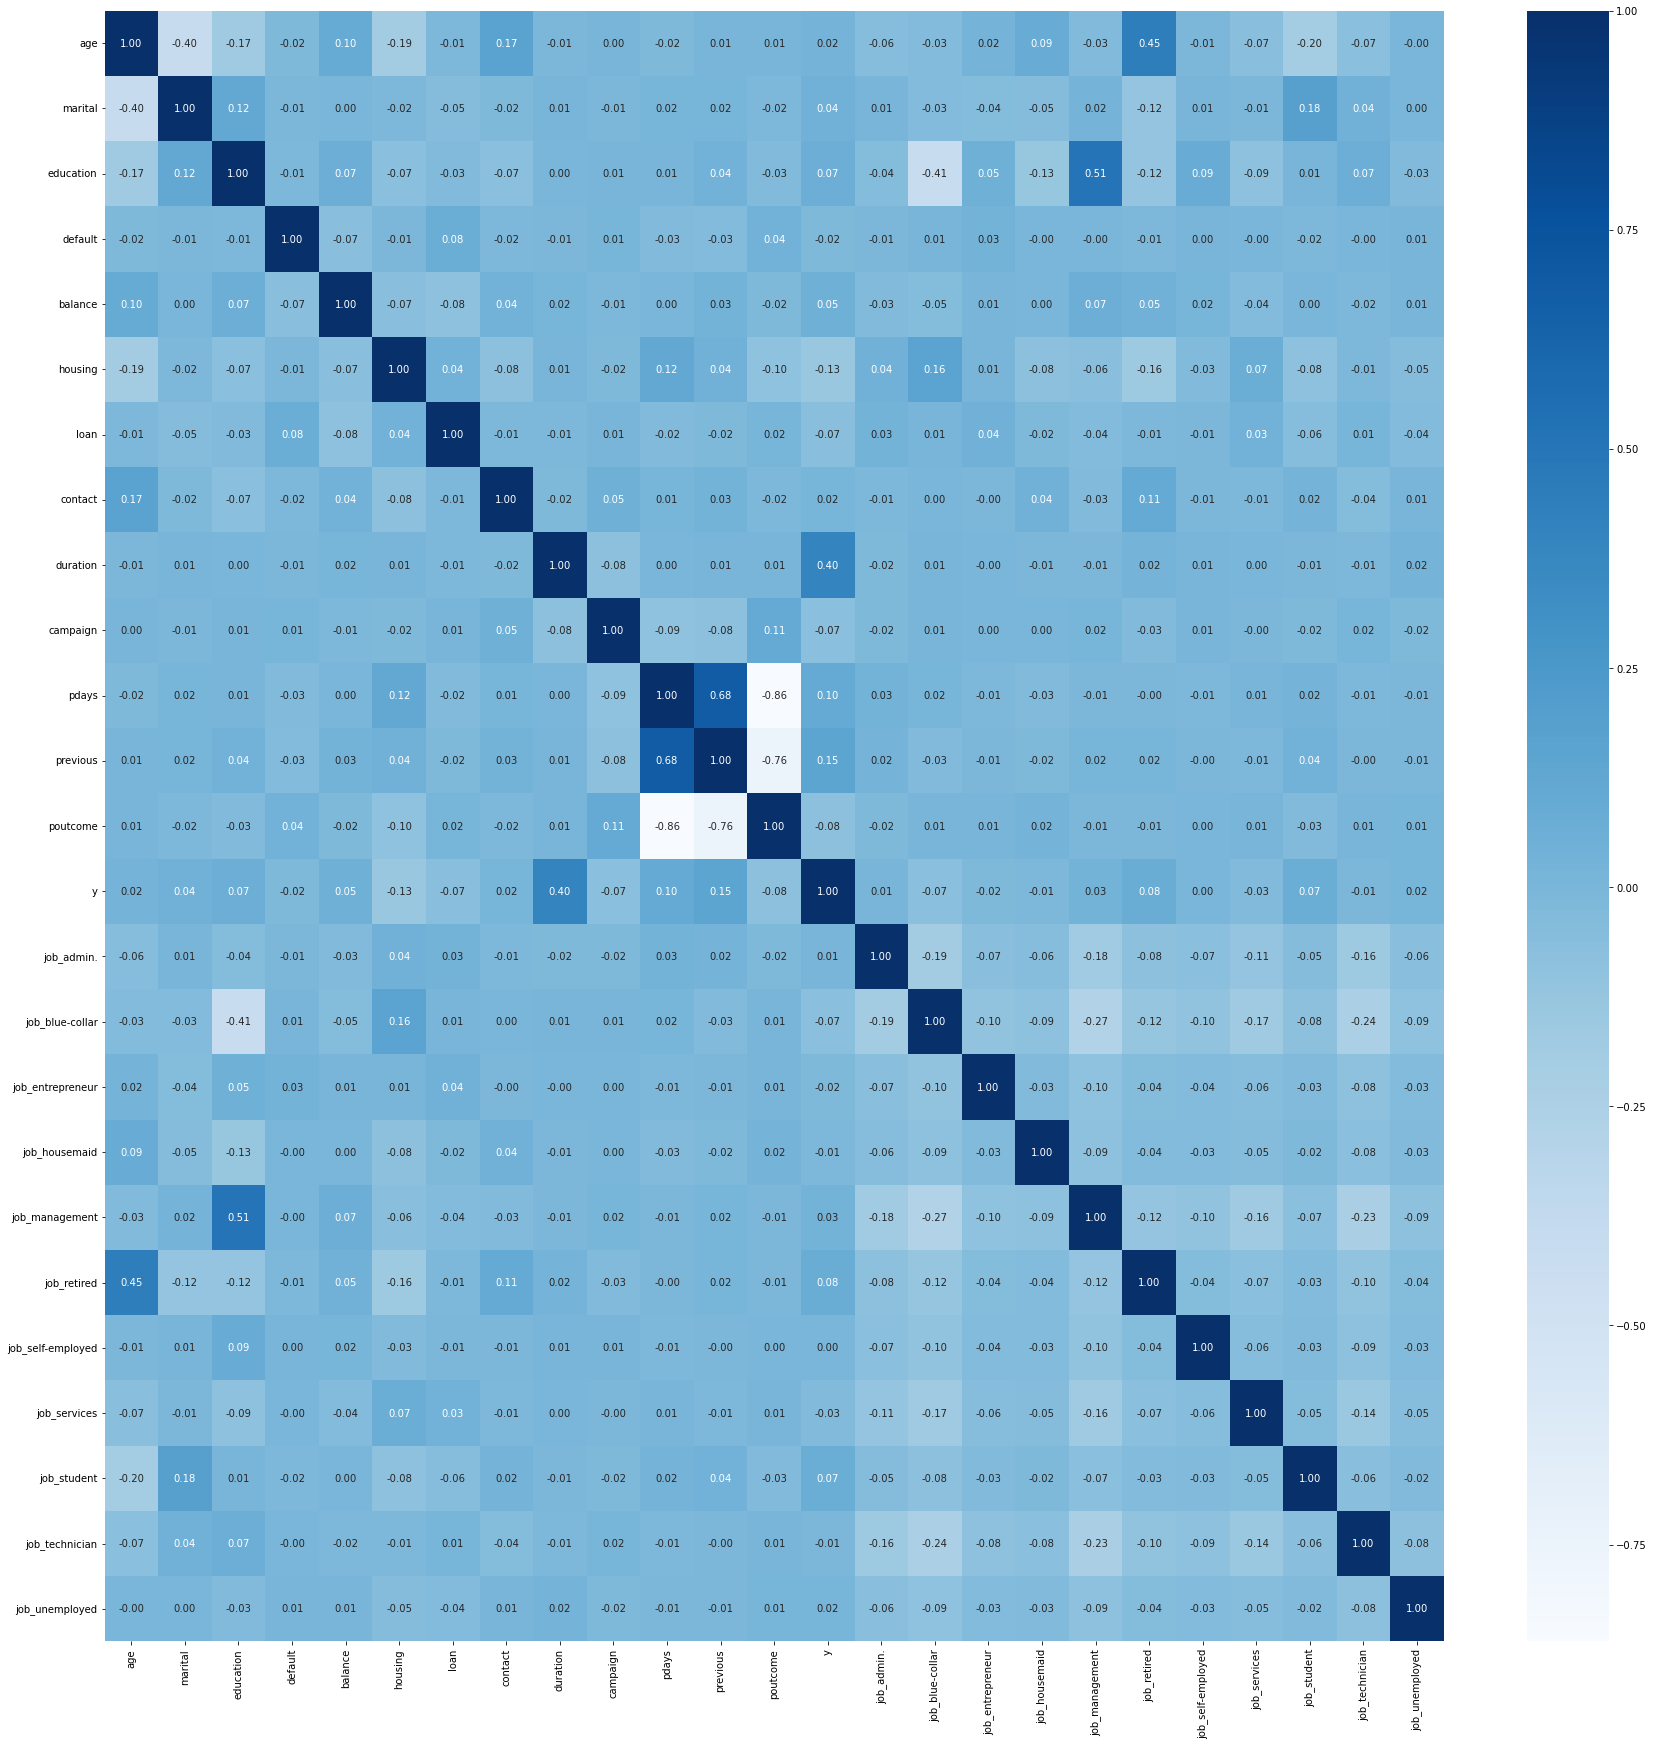

In [263]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

Dari heatmap diatas terdapat redundant pada fitur pdays dan poutcome, sehinggal salah satu fitur harus dihapus.

**H. Drop Feature (Rendundant / Low Correlation)**

In [265]:
abs(df.corr()['y'])

age                  0.024929
marital              0.042352
education            0.066925
default              0.019547
balance              0.049254
housing              0.134736
loan                 0.066796
contact              0.015683
duration             0.396930
campaign             0.070924
pdays                0.103608
previous             0.149251
poutcome             0.076402
y                    1.000000
job_admin.           0.005003
job_blue-collar      0.069009
job_entrepreneur     0.018791
job_housemaid        0.012322
job_management       0.031598
job_retired          0.078403
job_self-employed    0.001692
job_services         0.026922
job_student          0.074705
job_technician       0.009392
job_unemployed       0.017439
Name: y, dtype: float64

In [266]:
#Drop feature berkorelasi rendah
df = df.drop(columns=['age', 'default', 'contact'])
df.head()

#Drop feature yang redundant
df = df.drop(columns=['pdays'])
df.head()

,marital,education,balance,housing,loan,duration,campaign,previous,poutcome,y,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,1,2,0.255273,1,0,0.008624,-0.56812,0,3,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1,-0.438646,1,0,-0.417774,-0.56812,0,3,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,-0.447509,1,1,-0.708500,-0.56812,0,3,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0.046178,1,0,-0.646478,-0.56812,0,3,0,...,1,0,0,0,0,0,0,0,0,0
4,2,1,-0.447837,0,0,-0.235586,-0.56812,0,3,0,...,1,0,0,0,0,0,0,0,0,0


In [267]:
class_0 = df[df['y'] == 0]
class_1 = df[df['y'] == 1]# print the shape of the class
print('class y_0:', class_0.shape)
print('class y_1:', class_1.shape)

class y_0: (43442, 21)
class y_1: (5656, 21)


Terdapat class imbalanced dimana jumlah class_0 jauh lebih besar dibanding class_1. Untuk handling class imbalaced dilakukan pada data training, sehingga sebelum melakukan handling class imbalaced harus melakukan split antara data training dan data testing.

**I. Spliting Data Train & Data Test**

In [272]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=42)

In [278]:
X = df.drop(columns=['y'])
y = df['y']

x_test = test.drop(columns=['y'])
y_test = test['y']

x_train = train.drop(columns=['y'])
y_train = train['y']

**J. Class Imbalanced**

In [279]:
from imblearn import under_sampling, over_sampling
from collections import Counter
x_train_under, y_train_under = over_sampling.SMOTE().fit_resample(x_train, y_train)
print('SMOTE')
print(pd.Series(y_train_under).value_counts())
print('Original Dataset:', Counter(y_train))
print('Resample Dataset', Counter(y_train_under))

SMOTE
0    32575
1    32575
Name: y, dtype: int64
Original Dataset: Counter({0: 32575, 1: 4248})
Resample Dataset Counter({0: 32575, 1: 32575})


## Modeling, Model Evaluation & Hyperparameter Tuning

In [280]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train_under)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train_under)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_under, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

### Model 1 : Logistics Regression

In [281]:
#Logistics Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_under, y_train_under)
eval_classification(logreg)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.35
Recall (Test Set): 0.76
F1-Score (Test Set): 0.48
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.89
roc_auc (crossval train): 0.8702064763582991
roc_auc (crossval test): 0.838062659598652


### Interpretasi Model LogReg
Pada kasus Banking Marketing Targets, hal yang menjadi perhatian lebih adalah metriks accuracy (masing-masing label memiliki kepentingan yang sama dan jumlah label seimbang) yaitu sebesar **0.81**. Pada dasarnya terdapat keseimbangan kepentingan antara hasil prediksi False Negatif dengan False Positive. Jika terjadi banyak terjadi False Negative maka Bank akan kehilangan potensi  nasabah deposito, sedangkan jika terjadi banyak False Positive Bank akan mengalami peningkatan biaya telepon namun konversi rendah.


##### Apakah Terjadi Overfiting/Underfiting pada Model Logistics Regression ?

Pada model logistics regression, nilai dari ROC-AUC cross validation pada data train lebih besar dari nilai ROC-AUC pada data test dengan selisih yang tidak begitu eksrim yaitu sekitar 0.032. Model menggunakan threshold sebesar 0.1, maka dapat disimpulkan bahwa pada model logistics regression ini **tidak terjadi overfiting / underfiting** dan tidak perlu dilakukan hyperparameter tuning pada model.

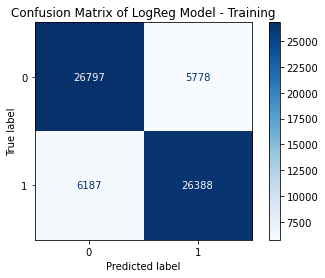

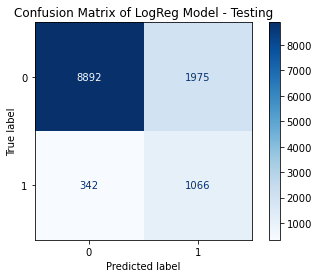

In [282]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg, x_train_under, y_train_under, cmap='Blues')
plt.title('Confusion Matrix of LogReg Model - Training')

plot_confusion_matrix(logreg, x_test, y_test, cmap='Blues')
plt.title('Confusion Matrix of LogReg Model - Testing')

plt.show()

### Feature Importance Model LogReg

In [283]:
#LogReg Feature Importance
feature_importances = pd.DataFrame(logreg.coef_[0], index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head()

,importance
duration,1.442567
previous,0.350934
education,0.233644
marital,0.101496
poutcome,-0.002229


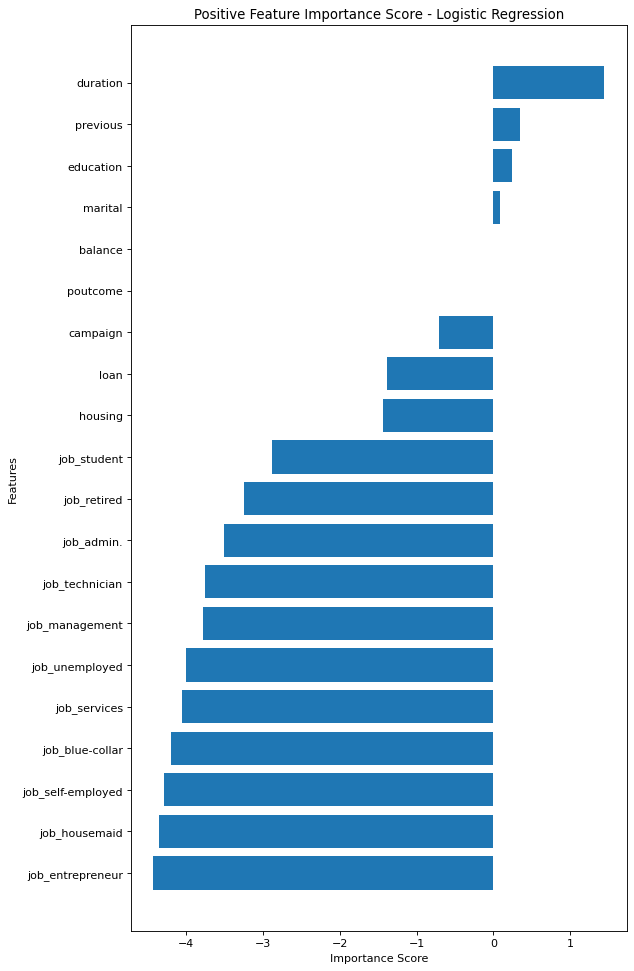

In [248]:
num = np.min([50, len(X.columns)])
ylocs = np.arange(num)

values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

### Model 2 : Naive Bayes

In [284]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_under, y_train_under)
eval_classification(gnb)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.24
Recall (Test Set): 0.71
F1-Score (Test Set): 0.36
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.78
roc_auc (crossval train): 0.7821052558935324
roc_auc (crossval test): 0.7390697304889847


### Interpretasi Model Naive Bayes
Nilai accuracy pada model Naive Bayes adalah sebesar **0.70**, lebih rendah dibanding  nilai accuracy model Logistics Regression yang sebesar **0.81** dan begitu juga dengan metriks lainnya. Hal ini menunjukan secara performa model Logistics Regression lebih baik dibandingkan model Naive Bayes.


#### Apakah Terjadi Overfiting/Underfiting pada Model Naive Bayes ?

Pada model Naive Bayes, nilai ROC-AUC cross validation pada data train lebih besar dari nilai ROC-AUC pada data test dengan selisih yang tidak begitu eksrim yaitu sekitar 0.043. Model menggunakan threshold sebesar 0.1, maka dapat disimpulkan bahwa pada model logistics regression ini **tidak terjadi overfiting / underfiting** dan tidak perlu dilakukan hyperparameter tuning pada model.

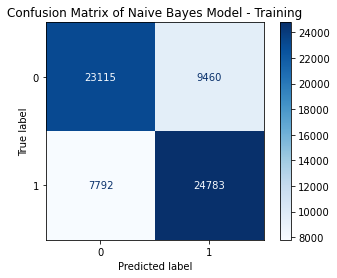

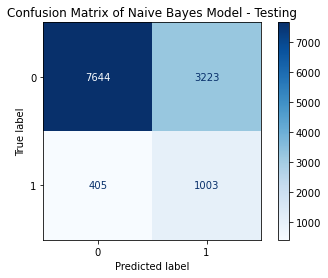

In [285]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gnb, x_train_under, y_train_under, cmap='Blues') 
plt.title('Confusion Matrix of Naive Bayes Model - Training')

plot_confusion_matrix(gnb, x_test, y_test, cmap='Blues')
plt.title('Confusion Matrix of Naive Bayes Model - Testing')

plt.show()

### Model 3 : k-Nearest Neighbor

In [252]:
# KNN
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train_under, y_train_under) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.34
Recall (Test Set): 0.72
F1-Score (Test Set): 0.46
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.99
roc_auc (crossval train): 0.9501407955085159
roc_auc (crossval test): 0.785153372748628


### Intepretasi Model kNN
Nilai accuracy pada model Naive Bayes adalah sebesar **0.81**, lebih tinggi dibanding  nilai accuracy model Logistics Regression dan Naive Bayes.


#### Apakah Terjadi Overfiting/Underfiting pada Model k-Nearest Neighbor ?

Pada model kNN, nilai dari ROC-AUC pada data train lebih besar dari nilai ROC-AUC pada data test dengan selisih yang besar yaitu sekitar 0.16 pada prediction probability dan 0.165 pada cross validation. Sehingga dapat disimpulkan bahwa pada model kNN ini **mengalami overfiting.**

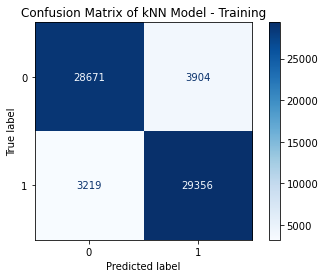

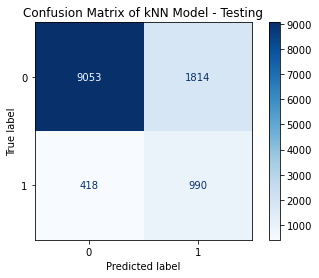

In [184]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib

plot_confusion_matrix(knn, x_train_under, y_train_under, cmap='Blues') 
plt.title('Confusion Matrix of kNN Model - Training')

plot_confusion_matrix(knn, x_test, y_test, cmap='Blues')
plt.title('Confusion Matrix of kNN Model - Testing')

plt.show()

### kNN Hypermarameter Tuning

In [132]:
# Hyperparameter Tuning in kNN
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,10))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(x_train_under, y_train_under)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(x_train_under, y_train_under)
eval_classification(rs)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.37
Recall (Test Set): 0.70
F1-Score (Test Set): 0.48
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.932515087335927
roc_auc (crossval test): 0.8157211384730191


Setelah dilakukan hyperparameter tuning , masih terlihat terjadi overfit dimana nilai dari nilai ROC-AUC pada training lebih besar dari ROC-AUC testing dengan dengan selisih **0.117**. Maka perlu dicermati dengan melihat learning curve agar nantinya dapat menemukan parameter yang lebih tepat untuk meningkatkan performa model kNN.

param value: 1; train: 1.0; test: 0.7315961467474505
param value: 2; train: 0.9970096000197902; test: 0.7841079017375374
param value: 3; train: 0.9933231264529756; test: 0.8085414976116182
param value: 4; train: 0.9896238424934725; test: 0.823028872598024
param value: 5; train: 0.9860222976789498; test: 0.8314961777002101
param value: 6; train: 0.9827074037185572; test: 0.8385173432179995
param value: 7; train: 0.979642476156034; test: 0.8432701538017517
param value: 8; train: 0.9766615726503982; test: 0.8448888014275915
param value: 9; train: 0.9738003636451449; test: 0.8490762470511222
param value: 10; train: 0.9712768991093816; test: 0.8522512250391092
param value: 11; train: 0.9687595257181463; test: 0.8552342187983637
param value: 12; train: 0.9663764864010027; test: 0.8572470958259785
param value: 13; train: 0.9640677381260201; test: 0.8598651071425583
param value: 14; train: 0.9619262411731826; test: 0.8619513466541739
param value: 15; train: 0.9600454722527682; test: 0.86300567

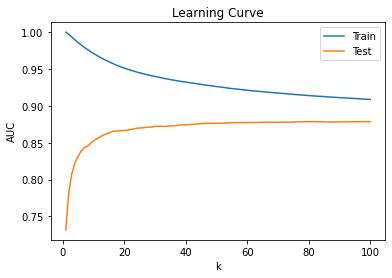

In [286]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(x_train_under, y_train_under)

        # eval on train
        y_pred_train_proba = model.predict_proba(x_train_under)
        train_auc = roc_auc_score(y_train_under, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(x_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

### Kesimpulan :

Dari ketiga model yang digunakan untuk mempredikasi subscription produk deposito bank, maka model yang paling baik dan direkomendasikan untuk digunakan adalah model **Logistics Regression**, sebab :
1. Memiliki nilai akurasi yang cukup baik yaitu **0.81**.
2. Tidak terjadi overfitting/underfitting yang dapat mengakibatkan bias variance trade-off.
3. Untuk model binary classification seperti kasus Banking Marketing Targets dimana output yang dari prediksi adalah "yes or no". Maka model Logistics Regression lebih cocok digunakan.
4. Metrik accuracyy pada model Logistics Regression lebih baik dibandingkan model Gaussian Naive Bayes.

Pada model kNN  walaupun skor accuracy sama, yaitu masing-masing 0.81 dan setelah hyperparameter tuning menjadi 0.83 namun nilai ROC-AUC train lebih besar daripada nilai ROC-AUC test dengan rentang nilai cukup besar. Hal ini dapat mengakibatkan variance trade-off dimana model salah mempredikasi data yang lebih general.